In [9]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import f1_score
import time
from sklearn.metrics import classification_report

In [109]:
data = pd.read_csv("train.csv")

data['medv'] = data['medv'].mask(data['medv'] >= 25, 1)

data['medv'] = data['medv'].mask(data['medv'] > 1, 0)

print(data[0:5])

y = data.medv


X = data.drop('medv', axis=1)
X = X.drop('ID', axis=1)
print("__________")
print(y[0:5])
print("__________")
print(X[0:5])

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98   0.0  
1     17.8  396.90   9.14   0.0  
2     18.7  394.63   2.94   1.0  
3     18.7  396.90   5.33   1.0  
4     15.2  395.60  12.43   0.0  
__________
0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: medv, dtype: float64
__________
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.03237 

Now, let's split the sample via 8:2:

In [110]:
# Saving seed 
divide_seed = np.random.randint(1, 100)

# And then split the data
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=divide_seed)

# And check if they splitted correctly
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

266
67
266
67


Also, we need to normallize and scale the data, so we'll use Scaler:

In [111]:
scaler = StandardScaler()

# We normalize train sample
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# And test sample
scaler.fit(X_test)
X_test = scaler.transform(X_test)

Let's start with a linear regression all over the model:


In [114]:
lr = LinearRegression()

lr.fit(X_train, y_train)

prediction_lr = lr.predict(X_test)

print("Test result:", lr.score(X_test, y_test))

print("Train result:", lr.score(X_train, y_train))

Test result: 0.5105602689817332
Train result: 0.5079745531443174


Now, let's try to improve the quality by using ID feature too:

In [137]:
list_of_predictions_knn = list()
list_of_test_results_knn = list()
list_of_train_results_knn = list()
list_of_f_knn = list()

for i in range(2, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_predict = knn.predict(X_train)
    list_of_predictions_knn.append(knn_predict)
    list_of_test_results_knn.append(knn.score(X_test, y_test))
    #list_of_train_results_knn.append(knn.score(X_train, y_train))
    list_of_f_knn.append(f1_score(y_train, knn_predict))
    print("Predicted with ", i, " neighbours")

Predicted with  2  neighbours
Predicted with  3  neighbours
Predicted with  4  neighbours
Predicted with  5  neighbours
Predicted with  6  neighbours
Predicted with  7  neighbours
Predicted with  8  neighbours
Predicted with  9  neighbours
Predicted with  10  neighbours
Predicted with  11  neighbours
Predicted with  12  neighbours
Predicted with  13  neighbours
Predicted with  14  neighbours
Predicted with  15  neighbours
Predicted with  16  neighbours
Predicted with  17  neighbours
Predicted with  18  neighbours
Predicted with  19  neighbours
Predicted with  20  neighbours
Predicted with  21  neighbours
Predicted with  22  neighbours
Predicted with  23  neighbours
Predicted with  24  neighbours
Predicted with  25  neighbours
Predicted with  26  neighbours
Predicted with  27  neighbours
Predicted with  28  neighbours
Predicted with  29  neighbours
Predicted with  30  neighbours
Predicted with  31  neighbours
Predicted with  32  neighbours
Predicted with  33  neighbours
Predicted with  

Predicted with  37  neighbours
Predicted with  38  neighbours
Predicted with  39  neighbours
Predicted with  40  neighbours
Predicted with  41  neighbours
Predicted with  42  neighbours
Predicted with  43  neighbours
Predicted with  44  neighbours
Predicted with  45  neighbours
Predicted with  46  neighbours
Predicted with  47  neighbours
Predicted with  48  neighbours
Predicted with  49  neighbours
Predicted with  50  neighbours
Predicted with  51  neighbours
Predicted with  52  neighbours
Predicted with  53  neighbours
Predicted with  54  neighbours
Predicted with  55  neighbours
Predicted with  56  neighbours
Predicted with  57  neighbours
Predicted with  58  neighbours
Predicted with  59  neighbours


Predicted with  60  neighbours
Predicted with  61  neighbours
Predicted with  62  neighbours
Predicted with  63  neighbours
Predicted with  64  neighbours
Predicted with  65  neighbours
Predicted with  66  neighbours
Predicted with  67  neighbours
Predicted with  68  neighbours
Predicted with  69  neighbours
Predicted with  70  neighbours
Predicted with  71  neighbours
Predicted with  72  neighbours
Predicted with  73  neighbours
Predicted with  74  neighbours
Predicted with  75  neighbours
Predicted with  76  neighbours
Predicted with  77  neighbours
Predicted with  78  neighbours
Predicted with  79  neighbours
Predicted with  80  neighbours
Predicted with  81  neighbours
Predicted with  82  neighbours
Predicted with  83  neighbours
Predicted with  84  neighbours


Predicted with  85  neighbours
Predicted with  86  neighbours
Predicted with  87  neighbours
Predicted with  88  neighbours
Predicted with  89  neighbours
Predicted with  90  neighbours
Predicted with  91  neighbours
Predicted with  92  neighbours
Predicted with  93  neighbours
Predicted with  94  neighbours
Predicted with  95  neighbours
Predicted with  96  neighbours
Predicted with  97  neighbours
Predicted with  98  neighbours
Predicted with  99  neighbours


Max test result:  0.9402985074626866  takes  6  neighbors
Max test f-measure:  0.9117647058823529  takes  3  neighbors


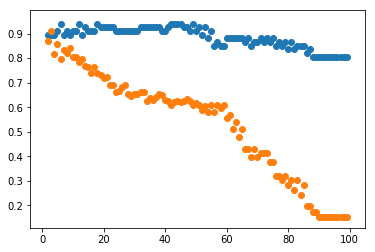

In [122]:
print("Max test result: ", max(list_of_test_results_knn), 
      " takes ", (list_of_test_results_knn.index(max(list_of_test_results_knn))+2), " neighbors")

plt.scatter(x=list((range(2, 100))), y=list_of_test_results_knn)

print("Max test f-measure: ", max(list_of_f_knn), 
      " takes ", (list_of_f_knn.index(max(list_of_f_knn))+2), " neighbors")

plt.scatter(x=list((range(2, 100))), y=list_of_f_knn)

Now, let's try to use Logistic regression:

Train result: 0.9022556390977443
Accuracy: 0.8955223880597015
######################################################


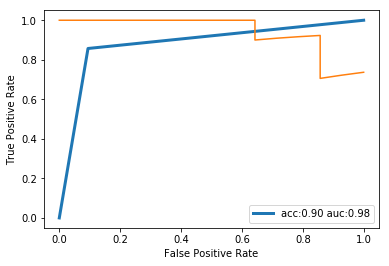

In [124]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

prediction = logistic_model.predict(X_test)

#print("Test result:", logistic_model.score(X_test, y_test))

print("Train result:", logistic_model.score(X_train, y_train))

print("Accuracy:", accuracy_score(y_test, prediction))

#print("AUC-ROC:", roc_auc_score(y_test, prediction))

#print("F-measure: ", f1_score(y_test, prediction))

print("######################################################")
logistic_model_proba = LogisticRegression()

logistic_model_proba.fit(X_train, y_train)

prediction_proba = logistic_model.predict_proba(X_test)


# Now let's create the ROC-curve and PR-curve to represent our model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
fpr, tpr, _ = roc_curve(y_test, prediction)
acc = logistic_model.score(X_test, y_test)
auc = roc_auc_score(y_test, prediction_proba[:, 1])
plt.plot(fpr, tpr, label="acc:%.2f auc:%.2f" % (acc, auc), linewidth=3)
plt.legend(loc="best")

precision, recall, thresholds = precision_recall_curve(y_test, prediction_proba[:, 1])

#plt.plot(fpr, tpr)

plt.plot(recall, precision)

Now Decision Tree:

In [126]:
decision_tree = DecisionTreeClassifier(random_state=3)

decision_tree.fit(X_train, y_train)

prediction_tree = decision_tree.predict(X_test)

print("Test result (accuracy):", decision_tree.score(X_test, y_test))

print("Accuracy:", accuracy_score(y_test, prediction_tree))

auc_roc_tree = roc_auc_score(y_test, prediction_tree)

print("AUC-ROC:", auc_roc_tree)

print("F-measure: ", f1_score(y_test, prediction_tree))

print("######################################################")
decision_tree_proba = DecisionTreeClassifier(random_state=3)

decision_tree_proba.fit(X_train, y_train)

prediction_tree_proba = decision_tree_proba.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, prediction_tree_proba))

auc_roc_tree = roc_auc_score(y_test, prediction_tree_proba)

print("AUC-ROC:", auc_roc_tree)

Test result (accuracy): 0.7611940298507462
Accuracy: 0.7611940298507462
AUC-ROC: 0.5336927223719676
F-measure:  0.2
######################################################
Accuracy: 0.7611940298507462
AUC-ROC: 0.5336927223719676


Not really impressive, so let's try to add bagging:

In [128]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=3), n_estimators=100)

bagging.fit(X_train, y_train)

prediction_bagging = bagging.predict(X_test)

auc_roc_tree = roc_auc_score(y_test, prediction_bagging)

print("######################################################")
bagging_proba = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=3), n_estimators=100)

bagging_proba.fit(X_train, y_train)

prediction_bagging_proba = bagging_proba.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, prediction_bagging_proba > 0.5))

auc_roc_tree = roc_auc_score(y_test, prediction_bagging_proba)

print("AUC-ROC:", auc_roc_tree)

print("F-measure: ", f1_score(y_test, prediction_bagging))

######################################################
Accuracy: 0.9402985074626866
AUC-ROC: 0.9824797843665769
F-measure:  0.896551724137931


Much better, but let's look at this in RandomForest:

In [130]:
test_forest_results = list()
train_forest_results = list()
accuracy_forest_results = list()
auc_roc_forest_results = list()
forest_f_results = list()
time_list = list()

accuracy_forest_results_proba = list()
auc_roc_forest_results_proba = list()

start = time.time()
cur_time = start

for j in range(10, 1000, 10):
    
    decision_forest = RandomForestClassifier(random_state=3, n_estimators=j)
    decision_forest_proba = RandomForestClassifier(random_state=3, n_estimators=j)

    decision_forest.fit(X_train, y_train)
    
    decision_forest_proba.fit(X_train, y_train)

    prediction_forest = decision_forest.predict(X_test)
    
    prediction_forest_pr = decision_forest_proba.predict_proba(X_test)[:, 1]

    test_forest_results.append(decision_forest.score(X_test, y_test))

    train_forest_results.append(decision_forest.score(X_train, y_train))

    accuracy_forest_results.append(accuracy_score(y_test, prediction_forest))
    
    accuracy_forest_results_proba.append(accuracy_score(y_test, prediction_forest_pr > 0.5))

    auc_roc_forest = roc_auc_score(y_test, prediction_forest)
    
    forest_f_results.append(f1_score(y_test, prediction_forest > 0.5))

    auc_roc_forest_results.append(auc_roc_forest)
    auc_roc_forest_results_proba.append(roc_auc_score(y_test, prediction_forest_pr))
    if j % 50 == 0:
        cur_time = time.time() - cur_time
        if j % 100 != 0:
            time_list.append(cur_time)
            print('Number of trees:', j)
            print("Prediction completed by", j/10, "%")
            print("Took ", cur_time, " seconds")
            print("--------------------")
print("Prediction completed by 100%")
finish = time.time() - start

print("Prediction took ", finish, " seconds")

Number of trees: 50
Prediction completed by 5.0 %
Took  0.4686558246612549  seconds
--------------------


Number of trees: 150
Prediction completed by 15.0 %
Took  2.3366498947143555  seconds
--------------------


Number of trees: 250
Prediction completed by 25.0 %
Took  5.568629026412964  seconds
--------------------


Number of trees: 350
Prediction completed by 35.0 %
Took  11.500606060028076  seconds
--------------------


Number of trees: 450
Prediction completed by 45.0 %
Took  17.365936040878296  seconds
--------------------


Number of trees: 550
Prediction completed by 55.0 %
Took  25.067940950393677  seconds
--------------------


Number of trees: 650
Prediction completed by 65.0 %
Took  33.62836408615112  seconds
--------------------


Number of trees: 750
Prediction completed by 75.0 %
Took  43.700114011764526  seconds
--------------------


Number of trees: 850
Prediction completed by 85.0 %
Took  55.4137659072876  seconds
--------------------


Number of trees: 950
Prediction completed by 95.0 %
Took  68.39603114128113  seconds
--------------------


Prediction completed by 100%
Prediction took  141.5101819038391  seconds


Max test result:  0.9552238805970149  takes  10  trees
Max accuracy result:  0.9552238805970149  takes  10  trees
Max auc-roc result:  0.9454177897574124  takes  10  trees
Max accuracy result with proba:  0.9552238805970149  takes  10  trees
Max auc-roc result with proba:  0.9878706199460916  takes  10  trees
Max F-measure:  0.896551724137931  takes  10  trees


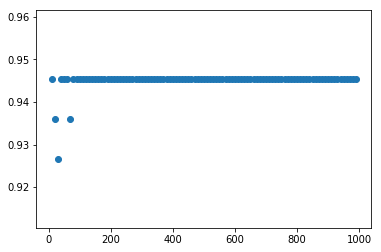

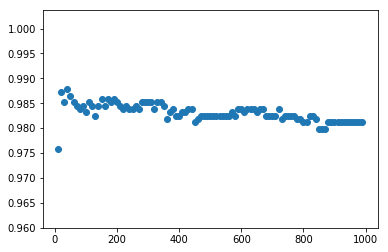

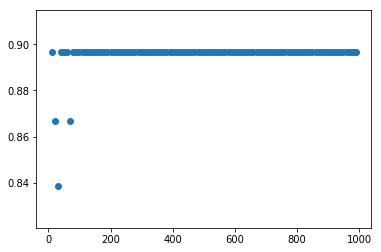

Time taken via number of trees:


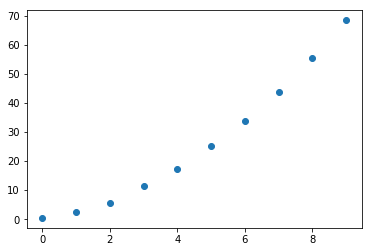

In [132]:
print("Max test result: ", max(test_forest_results), " takes ", (test_forest_results.index(max(test_forest_results))+1)*10, " trees")

print("Max accuracy result: ", max(accuracy_forest_results), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*10, " trees")

print("Max auc-roc result: ", max(auc_roc_forest_results), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*10, " trees")

print("Max accuracy result with proba: ", max(accuracy_forest_results_proba), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*10, " trees")

print("Max auc-roc result with proba: ", max(auc_roc_forest_results_proba), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*10, " trees")

print("Max F-measure: ", max(forest_f_results), " takes ", (forest_f_results.index(max(forest_f_results))+1)*10, " trees")


plt.scatter(x=list((range(10, 1000, 10))), y=auc_roc_forest_results)
plt.show()
plt.scatter(x=list((range(10, 1000, 10))), y=auc_roc_forest_results_proba)
plt.show()
plt.scatter(x=list((range(10, 1000, 10))), y=forest_f_results)
plt.show()

print("Time taken via number of trees:")
plt.scatter(x=list(range(0, 10)), y=time_list)
plt.show()

And finally, let's take a look at importances of the classes:

[0.04684665 0.0259699  0.08308823 0.01004519 0.06010964 0.29029753
 0.03617807 0.0640666  0.0218414  0.05266816 0.04791624 0.03261307
 0.22835931]


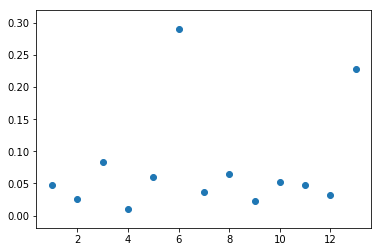

In [136]:
importances = list(decision_forest.feature_importances_)

number = list(range(1, 14))

print(decision_forest.feature_importances_)

plt.scatter(x=number, y=importances)